In [1]:
%load_ext autoreload

In [171]:
%autoreload
import numpy as np
import matplotlib.pyplot as plt
import lightning as pl
from gpt.model import ViT, LightningMAE, MAE, LightningWrapper, ClassificationHead, DebedHead
from gpt.data import MNISTDataModule, CIFAR10DataModule, Galaxy10DataModule
from gpt.utils import unpatchify
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import torchvision
from tqdm.auto import tqdm
from einops import rearrange
import matplotlib
import toml
import munch
import sys
sys.path.append('/mnt/home/jshen/ceph/programs/gpt/train/')
from train import setup

In [4]:
cfg = munch.munchify(toml.load('/mnt/home/jshen/ceph/programs/gpt/train/config.toml')).config

In [182]:
t = pl.Trainer()

/mnt/home/jshen/miniconda3/envs/main/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /mnt/home/jshen/miniconda3/envs/main/lib/python3.11/ ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [185]:
m = LightningWrapper(**ckpt['hyper_parameters'])

/mnt/home/jshen/miniconda3/envs/main/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'vit' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['vit'])`.


In [186]:
t.fit(m, ckpt_path='/mnt/home/jshen/ceph/programs/gpt/train/lightning_logs/version_3074761/checkpoints/epoch=26-step=66177.ckpt')

/mnt/home/jshen/miniconda3/envs/main/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:72: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
/mnt/home/jshen/miniconda3/envs/main/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:43: attribute 'modelclass' removed from hparams because it cannot be pickled
/mnt/home/jshen/miniconda3/envs/main/lib/python3.11/site-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Missing logger folder: /mnt/ceph/users/jshen/programs/gpt/notebooks/lightning_logs
Restoring states from the checkpoint path at /mnt/home/jshen/ceph/programs/gpt/train/lightning_logs/version_3074761/checkpoints/epoch=26-step=66177.ckpt


RuntimeError: Error(s) in loading state_dict for LightningWrapper:
	size mismatch for vit.patch_embed.in_proj.0.weight: copying a param with shape torch.Size([64, 3, 2, 2, 1]) from checkpoint, the shape in current model is torch.Size([768]).
	size mismatch for vit.patch_embed.in_proj.3.weight: copying a param with shape torch.Size([64, 64, 2, 2, 1]) from checkpoint, the shape in current model is torch.Size([16384]).
	size mismatch for vit.patch_embed.in_proj.6.weight: copying a param with shape torch.Size([256, 64, 1, 1, 1]) from checkpoint, the shape in current model is torch.Size([16384]).
	size mismatch for vit.positional_encoding.proj.weight: copying a param with shape torch.Size([256, 1, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([6912]).
	size mismatch for vit.blocks.0.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for vit.blocks.0.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for vit.blocks.0.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for vit.blocks.0.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for vit.blocks.0.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for vit.blocks.0.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for vit.blocks.0.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.0.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.0.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.0.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.1.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for vit.blocks.1.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for vit.blocks.1.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for vit.blocks.1.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for vit.blocks.1.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for vit.blocks.1.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for vit.blocks.1.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.1.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.1.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.1.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.2.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for vit.blocks.2.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for vit.blocks.2.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for vit.blocks.2.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for vit.blocks.2.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for vit.blocks.2.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for vit.blocks.2.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.2.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.2.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.2.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.3.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for vit.blocks.3.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for vit.blocks.3.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for vit.blocks.3.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for vit.blocks.3.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for vit.blocks.3.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for vit.blocks.3.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.3.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for vit.blocks.3.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([49472]).
	size mismatch for vit.blocks.3.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.3.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.3.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.ls1: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.ls2: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.ln1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.ln1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.ln2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.ln2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.0.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.attns.fns.1.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.0.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.0.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.0.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.0.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.1.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.1.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.4.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.ls1: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.ls2: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.ln1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.ln1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.ln2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.ln2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.0.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.attns.fns.1.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.0.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.0.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.0.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.0.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.1.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.1.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.blocks.5.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.norm.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for vit.norm.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.patch_embed.in_proj.0.weight: copying a param with shape torch.Size([64, 3, 2, 2, 1]) from checkpoint, the shape in current model is torch.Size([768]).
	size mismatch for model.vit.patch_embed.in_proj.3.weight: copying a param with shape torch.Size([64, 64, 2, 2, 1]) from checkpoint, the shape in current model is torch.Size([16384]).
	size mismatch for model.vit.patch_embed.in_proj.6.weight: copying a param with shape torch.Size([256, 64, 1, 1, 1]) from checkpoint, the shape in current model is torch.Size([16384]).
	size mismatch for model.vit.positional_encoding.proj.weight: copying a param with shape torch.Size([256, 1, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([6912]).
	size mismatch for model.vit.blocks.0.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.vit.blocks.0.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.vit.blocks.0.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.vit.blocks.0.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.vit.blocks.0.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.vit.blocks.0.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.vit.blocks.0.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.0.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.0.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.0.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.1.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.vit.blocks.1.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.vit.blocks.1.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.vit.blocks.1.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.vit.blocks.1.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.vit.blocks.1.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.vit.blocks.1.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.1.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.1.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.1.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.2.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.vit.blocks.2.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.vit.blocks.2.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.vit.blocks.2.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.vit.blocks.2.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.vit.blocks.2.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.vit.blocks.2.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.2.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.2.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.2.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.3.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.vit.blocks.3.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.vit.blocks.3.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.vit.blocks.3.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.vit.blocks.3.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.vit.blocks.3.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.vit.blocks.3.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.3.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.vit.blocks.3.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([49472]).
	size mismatch for model.vit.blocks.3.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.3.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.3.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.ls1: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.ls2: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.ln1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.ln1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.ln2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.ln2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.0.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.attns.fns.1.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.0.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.0.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.0.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.0.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.1.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.1.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.4.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.ls1: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.ls2: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.ln1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.ln1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.ln2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.ln2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.0.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.attns.fns.1.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.0.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.0.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.0.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.0.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.1.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.1.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.blocks.5.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.norm.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.vit.norm.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.patch_embed.in_proj.0.weight: copying a param with shape torch.Size([64, 3, 2, 2, 1]) from checkpoint, the shape in current model is torch.Size([768]).
	size mismatch for model.model.vit.patch_embed.in_proj.3.weight: copying a param with shape torch.Size([64, 64, 2, 2, 1]) from checkpoint, the shape in current model is torch.Size([16384]).
	size mismatch for model.model.vit.patch_embed.in_proj.6.weight: copying a param with shape torch.Size([256, 64, 1, 1, 1]) from checkpoint, the shape in current model is torch.Size([16384]).
	size mismatch for model.model.vit.positional_encoding.proj.weight: copying a param with shape torch.Size([256, 1, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([6912]).
	size mismatch for model.model.vit.blocks.0.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.model.vit.blocks.0.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.model.vit.blocks.0.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.model.vit.blocks.0.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.model.vit.blocks.0.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.model.vit.blocks.0.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.model.vit.blocks.0.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.0.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.0.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.0.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.1.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.model.vit.blocks.1.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.model.vit.blocks.1.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.model.vit.blocks.1.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.model.vit.blocks.1.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.model.vit.blocks.1.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.model.vit.blocks.1.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.1.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.1.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.1.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.2.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.model.vit.blocks.2.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.model.vit.blocks.2.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.model.vit.blocks.2.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.model.vit.blocks.2.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.model.vit.blocks.2.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.model.vit.blocks.2.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.2.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.2.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.2.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.3.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.model.vit.blocks.3.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.model.vit.blocks.3.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.model.vit.blocks.3.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.model.vit.blocks.3.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([196608]).
	size mismatch for model.model.vit.blocks.3.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([65536]).
	size mismatch for model.model.vit.blocks.3.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.3.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([131072]).
	size mismatch for model.model.vit.blocks.3.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([49472]).
	size mismatch for model.model.vit.blocks.3.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.3.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.3.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.ls1: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.ls2: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.ln1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.ln1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.ln2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.ln2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.0.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.attns.fns.1.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.0.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.0.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.0.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.0.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.1.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.1.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.4.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.ls1: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.ls2: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.ln1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.ln1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.ln2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.ln2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.0.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.reattn_weight: copying a param with shape torch.Size([8, 8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.to_qkv.weight: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.to_qkv.bias: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.proj.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.proj.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.qnorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.qnorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.knorm.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.knorm.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.rope.freqs: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.reattn_norm.1.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.attns.fns.1.reattn_norm.1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.0.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.0.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.0.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.0.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.0.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.0.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.1.net.0.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.1.net.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.1.net.1.weight: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.1.net.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.1.net.4.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.blocks.5.mlps.fns.1.net.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.norm.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).
	size mismatch for model.model.vit.norm.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([0]).

In [96]:
ckpt = torch.load('/mnt/home/jshen/ceph/programs/gpt/train/lightning_logs/version_3074761/checkpoints/epoch=22-step=56373.ckpt', map_location='cpu')

In [97]:
vit = ViT(embed_dim=cfg.embed_dim, mlp_ratio=cfg.mlp_ratio, num_heads=cfg.num_heads, num_blocks=cfg.num_blocks, image_size=(64, 64), image_channels=3, patch_size=(4, 4))
mae = MAE(vit, masking_fraction=0.7, decoder_num_blocks=1)

In [98]:
sd = {k.replace('model.', ''): v for k, v in ckpt['state_dict'].items() if k.startswith('model.')}

In [108]:
mae.load_state_dict(sd)

<All keys matched successfully>

In [100]:
def collate(lop):
    x, _ = zip(*lop)
    x = torch.stack(x)
    return x

g10 = Galaxy10DataModule(root_dir='/mnt/home/jshen/ceph/data/ml', batch_size=1, num_workers=1, collate_fn_test=collate)
g10.setup()
tl = g10.test_dataloader()

In [111]:
x = next(iter(tl))

In [112]:
with torch.no_grad():
    mp, omp, mask_idx = mae(x)

In [113]:
ix = 0

p2i = lambda x: TF.to_pil_image(g10.unnormalize(x))

# left
img_true = unpatchify(mp[ix].detach().cpu(), 3)

# middle
img_masked = mp[ix].detach().clone()
img_masked[mask_idx[ix]] = torch.nan
img_masked = unpatchify(img_masked, 3)

# right
oo = omp[ix].detach().cpu()
unmask_idx = torch.from_numpy(np.setdiff1d(np.arange(oo.shape[0]), mask_idx[ix]))
oo[unmask_idx] = mp[ix][unmask_idx].cpu()
img_recon = unpatchify(oo, 3)

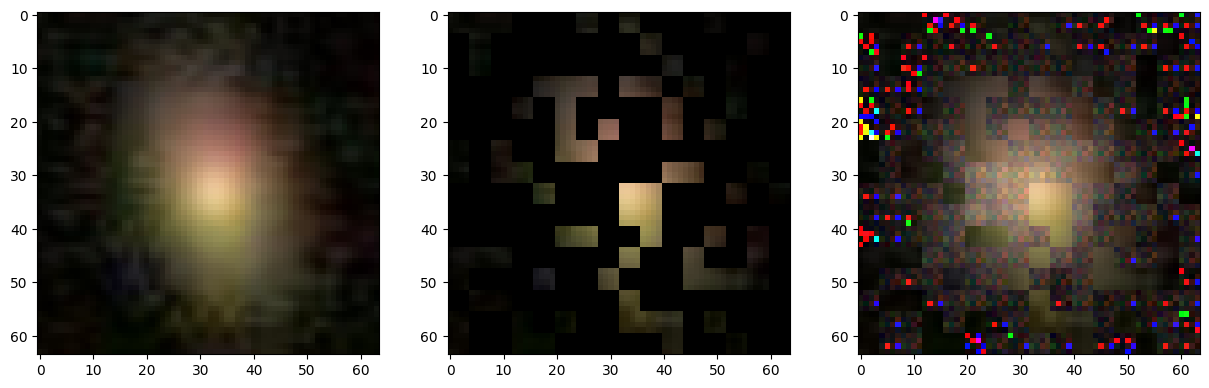

In [114]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(p2i(img_true))
ax[1].imshow(p2i(img_masked.detach().cpu()))
ax[2].imshow(p2i(img_recon))

In [3]:
model = LightningWrapper.load_from_checkpoint('../train/lightning_logs/version_1038869/checkpoints/epoch=29-step=23460.ckpt', map_location='cuda:0')

/scratch/gpfs/js5013/.conda/envs/foundation/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'output_head' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_head'])`.


In [4]:
def collate(lop):
    x, _ = zip(*lop)
    x = torch.stack(x)
    return x
mnist = MNISTDataModule(root_dir='/scratch/gpfs/js5013/data/ml/', num_workers=4, batch_size=32, collate_fn=collate)
mnist.setup()
tl = mnist.train_dataloader()

In [5]:
x = next(iter(tl))

In [8]:
def show(imgs, ncols=None, **kwargs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs) if ncols is None else ncols, squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = TF.to_pil_image(mnist.unnormalize(img))
        axs[0, i].imshow(np.asarray(img), **kwargs)
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

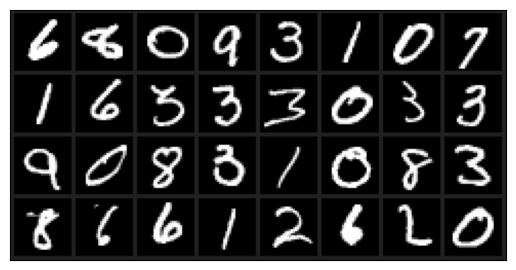

In [9]:
show(torchvision.utils.make_grid(x))

In [54]:
tll = mnist.test_dataloader()

In [55]:
x = next(iter(tll))

with torch.no_grad():
    mp, omp, mask_idx = model(x.to('cuda:1'))

In [56]:
p2i = lambda x: mnist.unnormalize(x)[0]

In [61]:
ix = 17

# left
img_true = unpatchify(mp[ix].detach().cpu(), 1)

# middle
img_masked = mp[ix].detach().clone()
img_masked[mask_idx[ix]] = torch.nan
img_masked = unpatchify(img_masked, 1)

# right
oo = omp[ix].detach().cpu()
unmask_idx = torch.from_numpy(np.setdiff1d(np.arange(oo.shape[0]), mask_idx[ix]))
oo[unmask_idx] = mp[ix][unmask_idx].cpu()
img_recon = unpatchify(oo, 1)

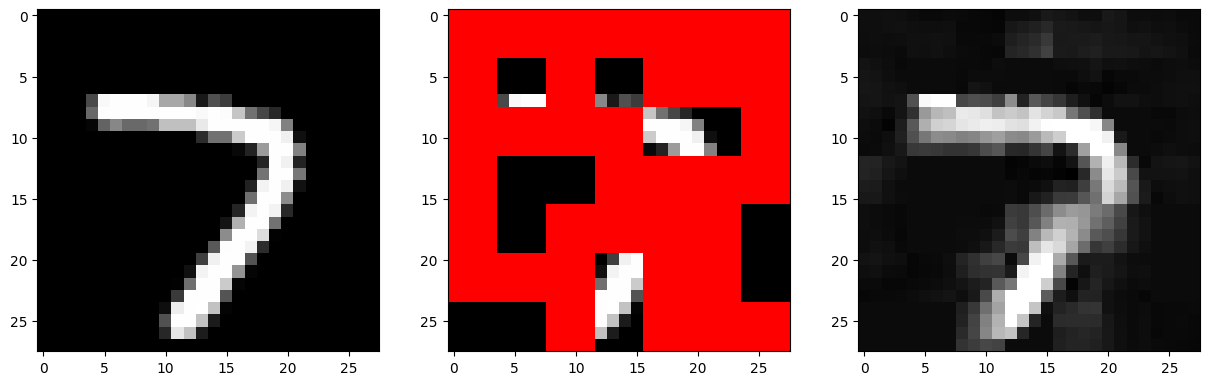

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
cmap = matplotlib.cm.gray
cmap.set_bad('red', 1.)
ax[0].imshow(p2i(img_true), cmap=cmap)
ax[1].imshow(p2i(img_masked.detach().cpu()), cmap=cmap)
ax[2].imshow(p2i(img_recon), cmap=cmap)

In [4]:
cifar = CIFAR10DataModule(batch_size=64)

In [5]:
cifar.setup()

In [6]:
tl = cifar.test_dataloader()

In [7]:
x, y = next(iter(tl))

In [9]:
with torch.no_grad():
    mp, omp, mask_idx = model(x.to('cuda:0'))

ValueError: too many values to unpack (expected 3)

In [178]:
p2i = lambda x: TF.to_pil_image(cifar.unnormalize(x))

In [179]:
ix = 12

# left
img_true = unpatchify(mp[ix].detach().cpu(), 3)

# middle
img_masked = mp[ix].detach().clone()
img_masked[mask_idx[ix]] = torch.nan

img_masked = unpatchify(img_masked, 3)

# right
oo = omp[ix].detach().cpu()
unmask_idx = torch.from_numpy(np.setdiff1d(np.arange(oo.shape[0]), mask_idx[ix]))
oo[unmask_idx] = mp[ix][unmask_idx].cpu()
img_recon = unpatchify(oo, 3)

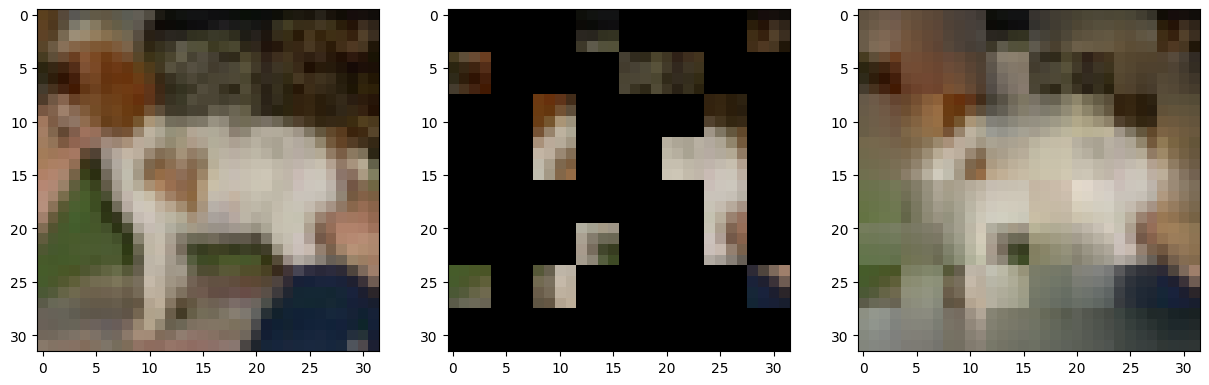

In [181]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(p2i(img_true))
ax[1].imshow(p2i(img_masked))
ax[2].imshow(p2i(img_recon))

In [4]:
imagenet = ImagenetH5DataModule(crop_transform=torchvision.transforms.Lambda(lambda x: x))
imagenet.setup()

In [5]:
vl = imagenet.test_dataloader()

In [6]:
x, y = next(iter(vl))

In [7]:
with torch.no_grad():
    mp, omp, mask_idx = model(x.cuda(1))

In [169]:
p2i = lambda x: TF.to_pil_image(imagenet.unnormalize(x))

In [170]:
ix = 52
oo = omp[ix].detach().cpu()
img_true = unpatchify(mp[ix].detach().cpu(), 3)
img = unpatchify(oo, 3)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [154]:
mp[ix][mask_idx[ix]].shape

torch.Size([39, 768])

In [164]:
img_masked[torch.from_numpy(np.setdiff1d(torch.arange(196), mask_idx[ix]))]

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [149]:
img_masked = mp[ix].detach().clone()
img_masked[mask_idx[ix]] = torch.nan
img_masked = unpatchify(img_masked, 3)

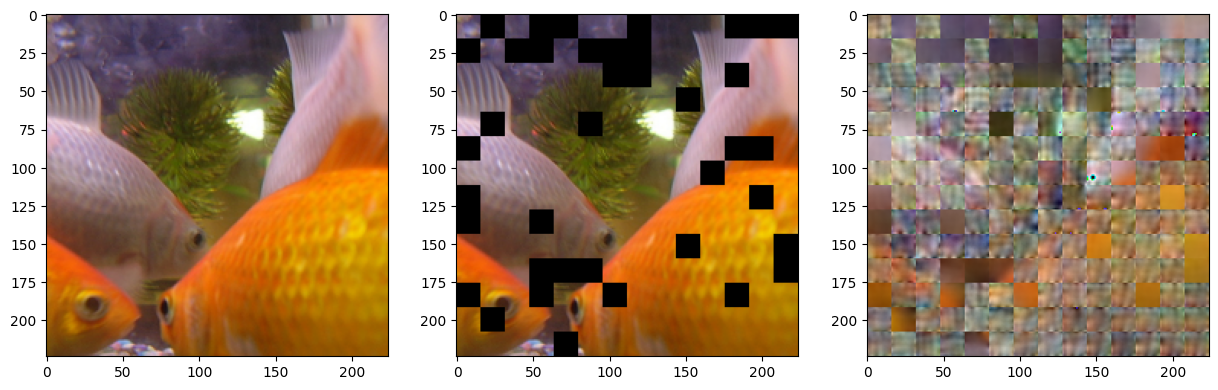

In [150]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(p2i(img_true))
ax[1].imshow(p2i(img_masked))
ax[2].imshow(p2i(img))